Este notebook apresenta uma análise da relação entre a acurácia do modelo na previsão dos rótulos de transação e o montante final obtido no período de backteste.

In [1]:
from labeling import *
from tradingUtils import *
from backtesting_process import *
import matplotlib.pyplot as plt

In [40]:
def test_accuracy(data):
    data_copy = data.copy()

    y = np.array(labelData(data_copy["Adj Close"].to_numpy())).ravel()

    equities = {}

    for accuracy in range(0, 101, 10):
        y_wrong = y.copy()
        error = 100 - accuracy

        num_to_change = int(len(y_wrong) * error/100)
        indices_to_change = np.random.choice(len(y_wrong), num_to_change, replace = False)

        for index in indices_to_change:
            current_value = y_wrong[index]
            new_value = np.random.choice([v for v in [-1, 0, 1] if v != current_value])
            y_wrong[index] = new_value

        policy = pd.Series(y_wrong, index = data_copy.index)
        data_copy["Signal"] = 0
        data_copy.loc[policy.index, "Signal"] = policy

        bt = Backtest(data_copy, OurStrategy, cash=10000)
        stats = bt.run()

        equities[accuracy] = stats["Equity Final [$]"]

    return equities

In [41]:
equities = {"PRIO3": test_accuracy(prio_data),
            "TSLA": test_accuracy(tsla_data),
            "AZUL4": test_accuracy(azul_data),
            "VIVA3": test_accuracy(viva_data)}

C:\Users\pedro\AppData\Local\Temp\ipykernel_11148\2342704654.py:22: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax.set_ylim(bottom = -100)


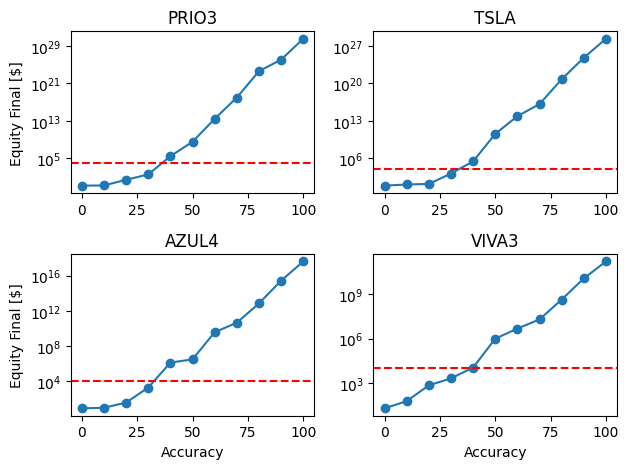

In [42]:
fig, axs = plt.subplots(2, 2)

axs[0, 0].plot(equities["PRIO3"].keys(), equities["PRIO3"].values(), marker = "o")
axs[0, 0].set_title('PRIO3')
axs[0, 0].set_ylabel('Equity Final [$]')

axs[0, 1].plot(equities["TSLA"].keys(), equities["TSLA"].values(), marker = "o")
axs[0, 1].set_title('TSLA')

axs[1, 0].plot(equities["AZUL4"].keys(), equities["AZUL4"].values(), marker = "o")
axs[1, 0].set_title('AZUL4')
axs[1, 0].set_ylabel('Equity Final [$]')
axs[1, 0].set_xlabel('Accuracy')

axs[1, 1].plot(equities["VIVA3"].keys(), equities["VIVA3"].values(), marker = "o")
axs[1, 1].set_title('VIVA3')
axs[1, 1].set_xlabel('Accuracy')

for ax in axs.flat:
    ax.set_yscale("log")
    ax.axhline(y = 10_000, color = "red", linestyle = "--")
    ax.set_ylim(bottom = -100)

plt.tight_layout()
plt.show()